In [ ]:
#1. Create a Flask app that displays "Hello, World!" on the homepage.
from flask import Flask

# Create a Flask web server
app = Flask(__name__)

# Define a route for the homepage
@app.route('/')
def hello_world():
    # Display "Hello, World!" on the homepage
    return 'Hello, World!'

# Run the Flask app
if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=8080)


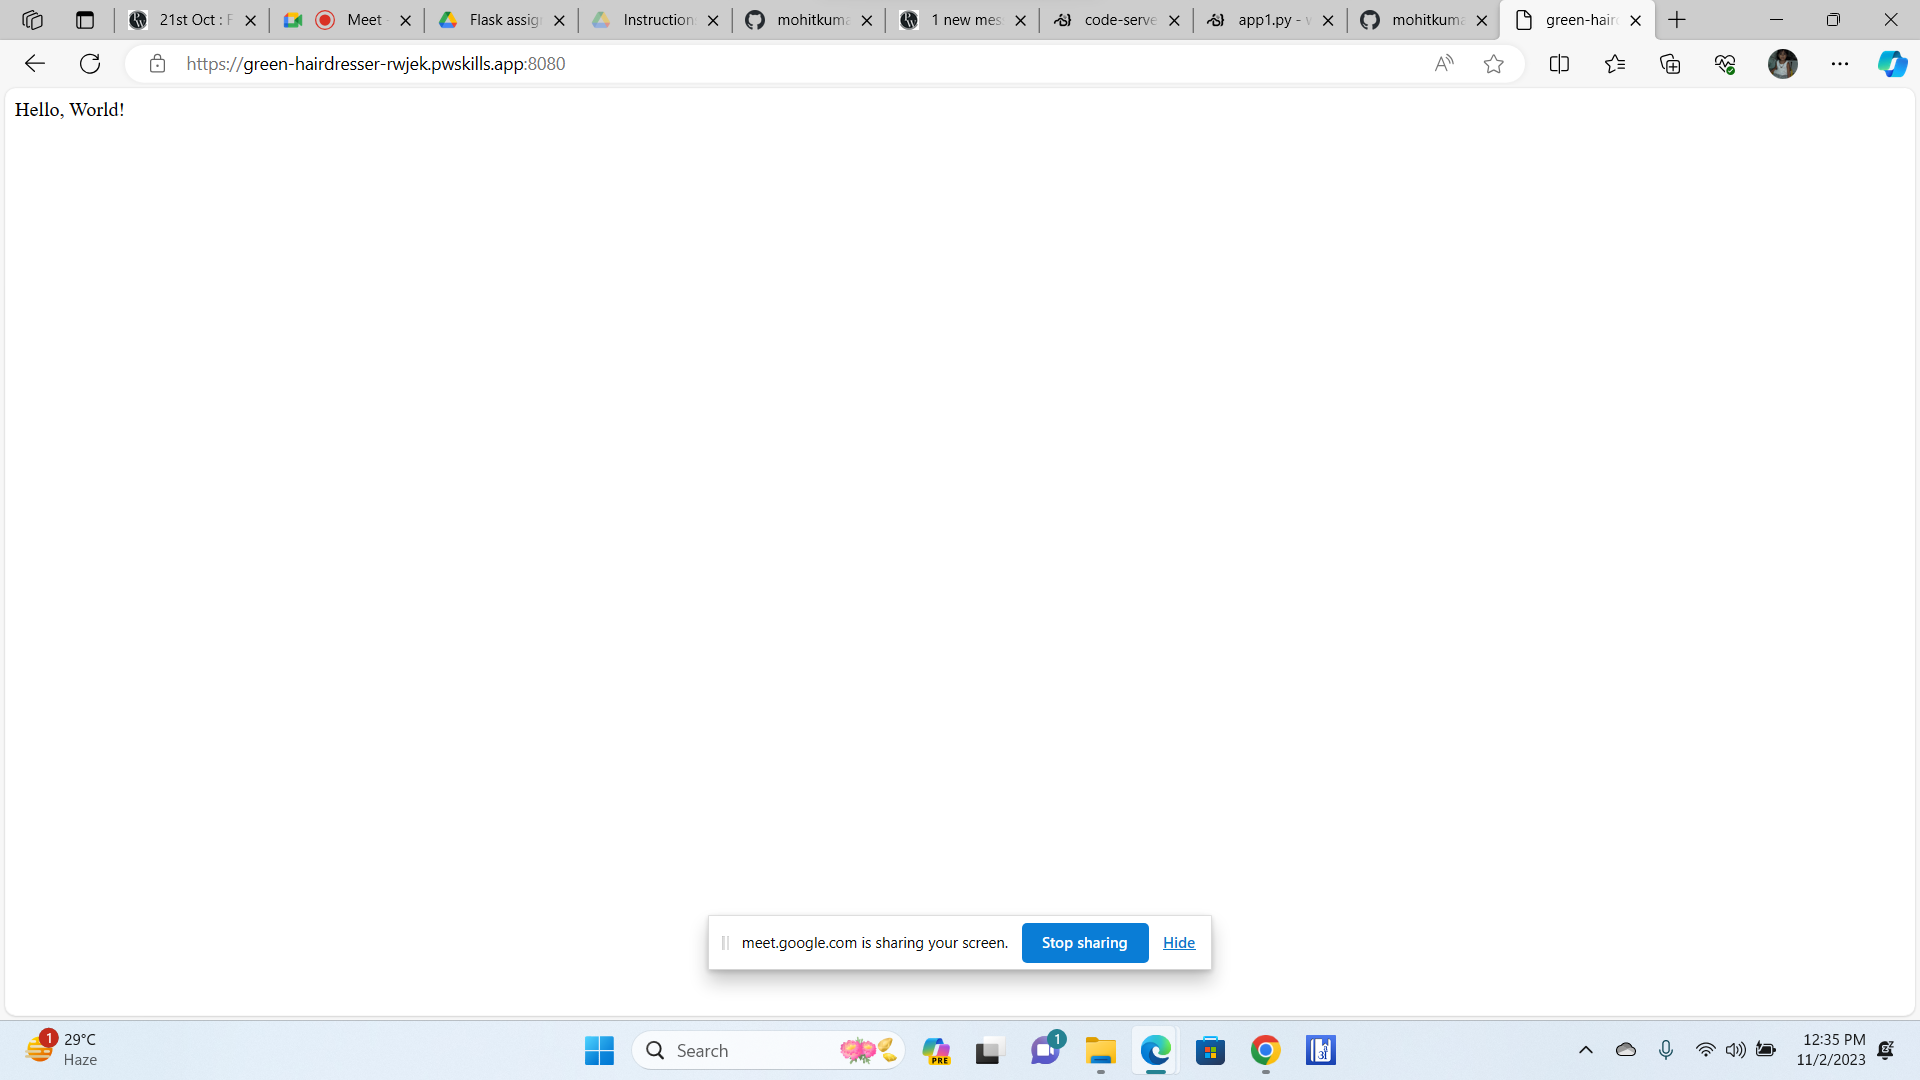

In [ ]:
#2. Build a Flask app with static HTML pages and navigate between them.
from flask import Flask, render_template

app = Flask(__name__)

# Define routes for different pages
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/page1')
def page1():
    return render_template('page1.html')

@app.route('/page2')
def page2():
    return render_template('page2.html')

if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=8082)


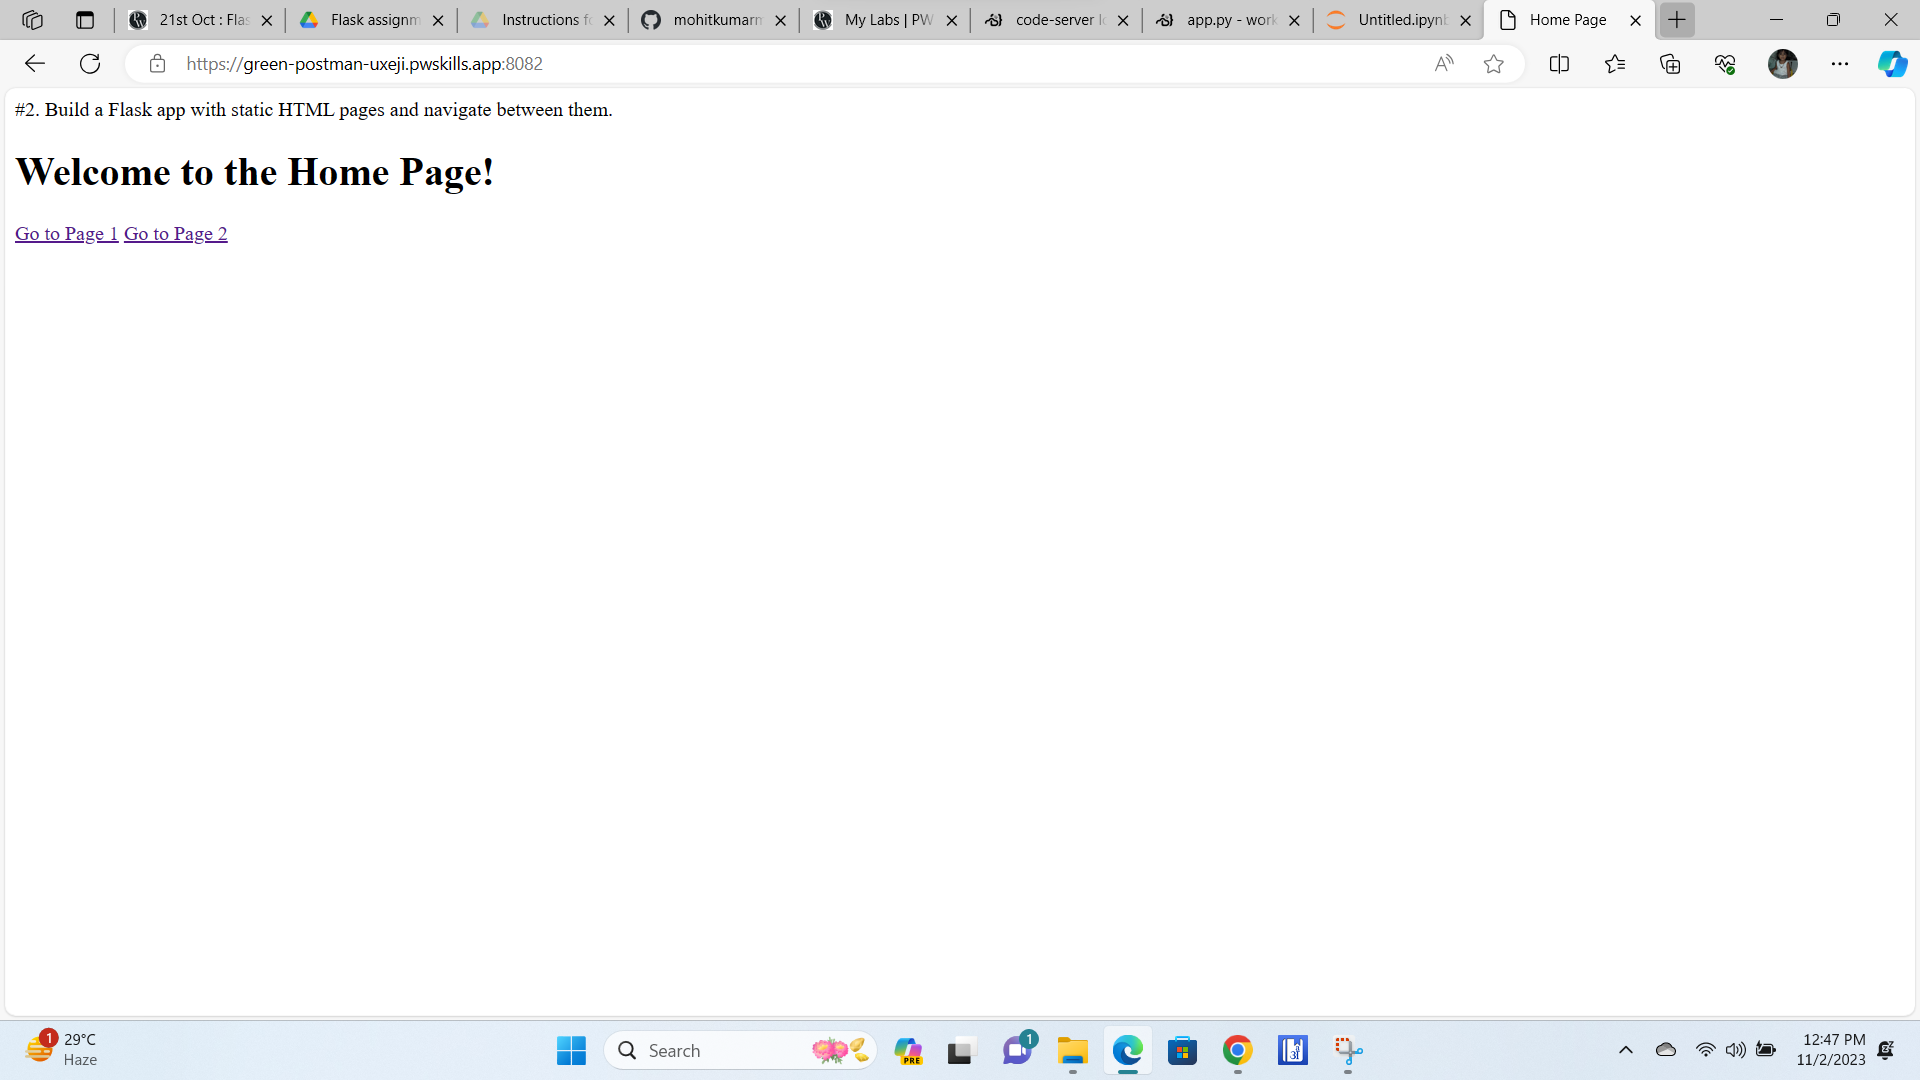

In [ ]:
#3. Develop a Flask app that uses URL parameters to display dynamic content.
from flask import Flask, render_template

app = Flask(__name__)

# Define a route that accepts a parameter in the URL
@app.route('/greet/<name>')
def greet(name):
    # Render the dynamic_page.html template with the provided name parameter
    return render_template('dynamic_page.html', name=name)

if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=8083)


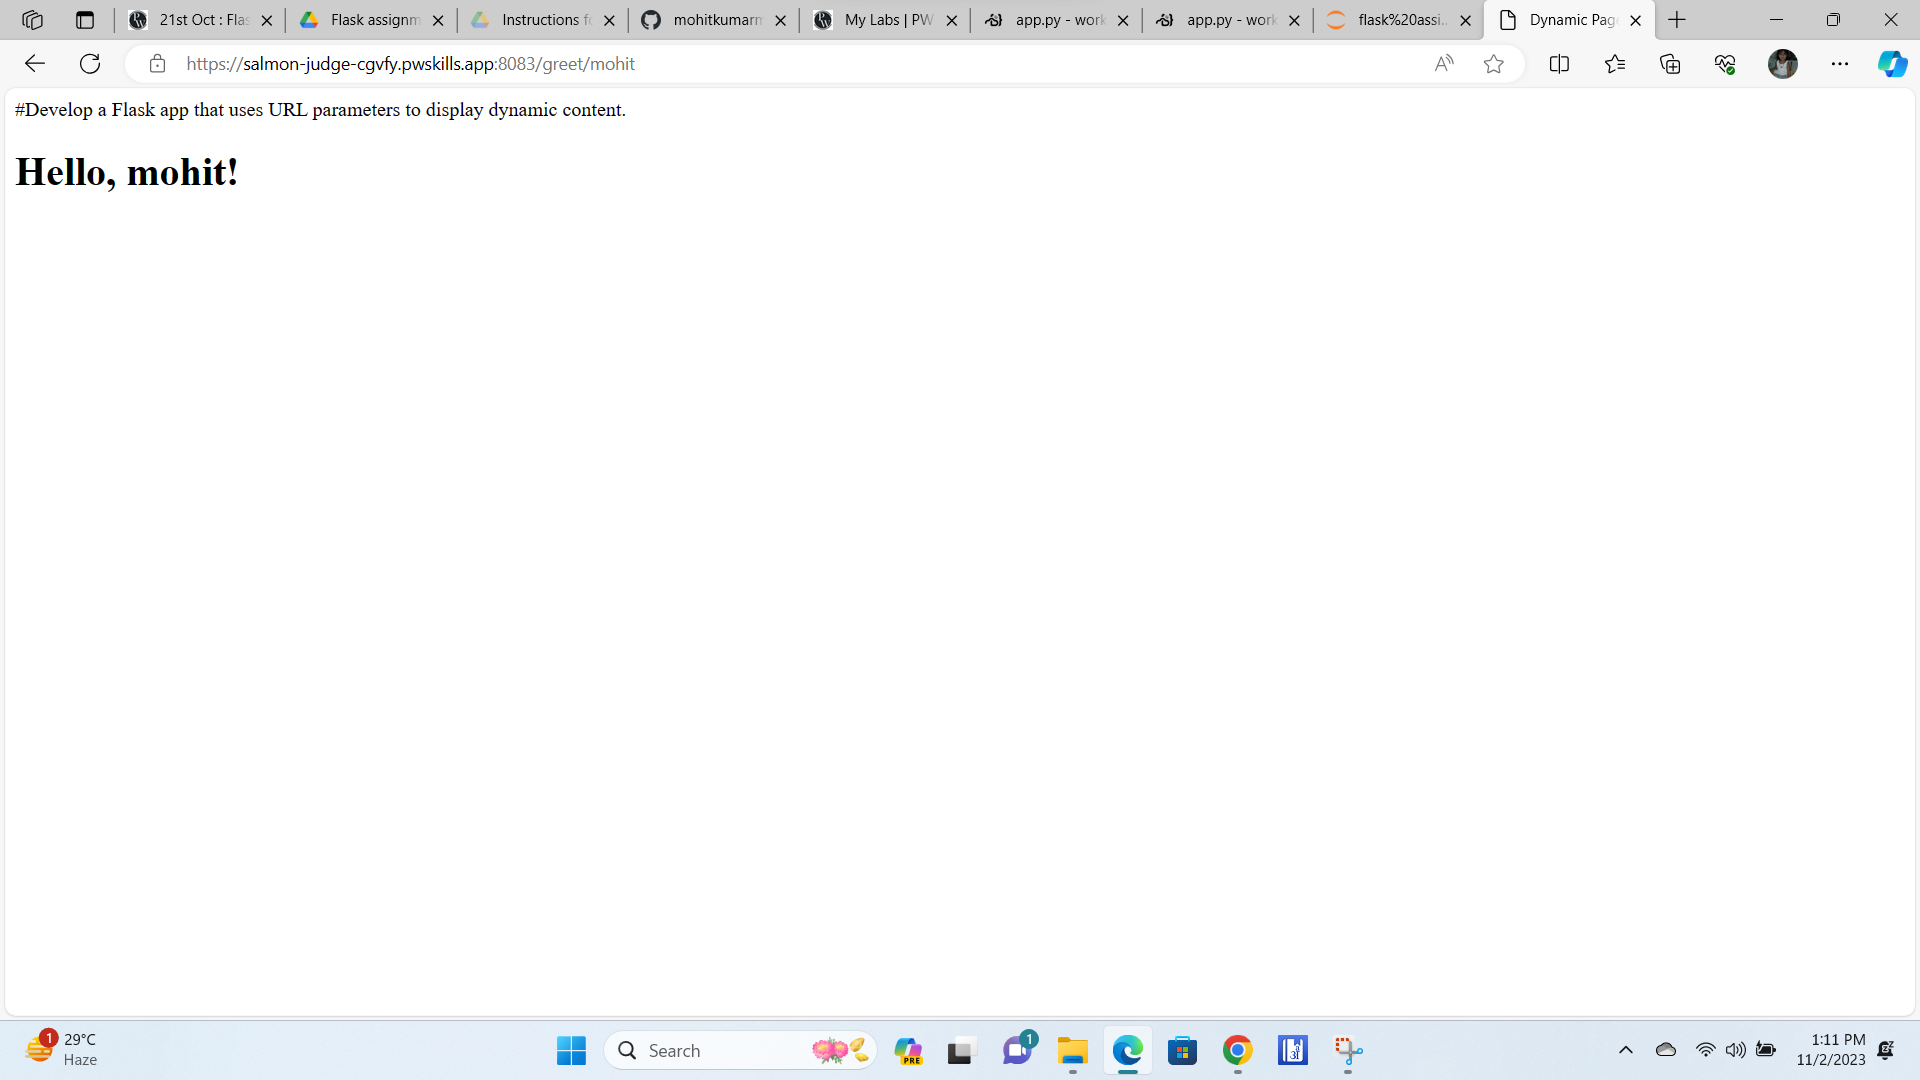

In [ ]:
#4. Create a Flask app with a form that accepts user input and displays it.
from flask import Flask, render_template, request

app = Flask(__name__)

# Define a route for the home page
@app.route('/', methods=['GET', 'POST'])
def index():
    # Initialize message variable
    message = None

    # Check if the request method is POST (form submission)
    if request.method == 'POST':
        # Get user input from the form
        user_input = request.form['user_input']
        # Process the user input (in this case, simply echoing it back)
        message = f'You entered: {user_input}'

    # Render the template with the form and the message
    return render_template('index.html', message=message)

if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=8081)


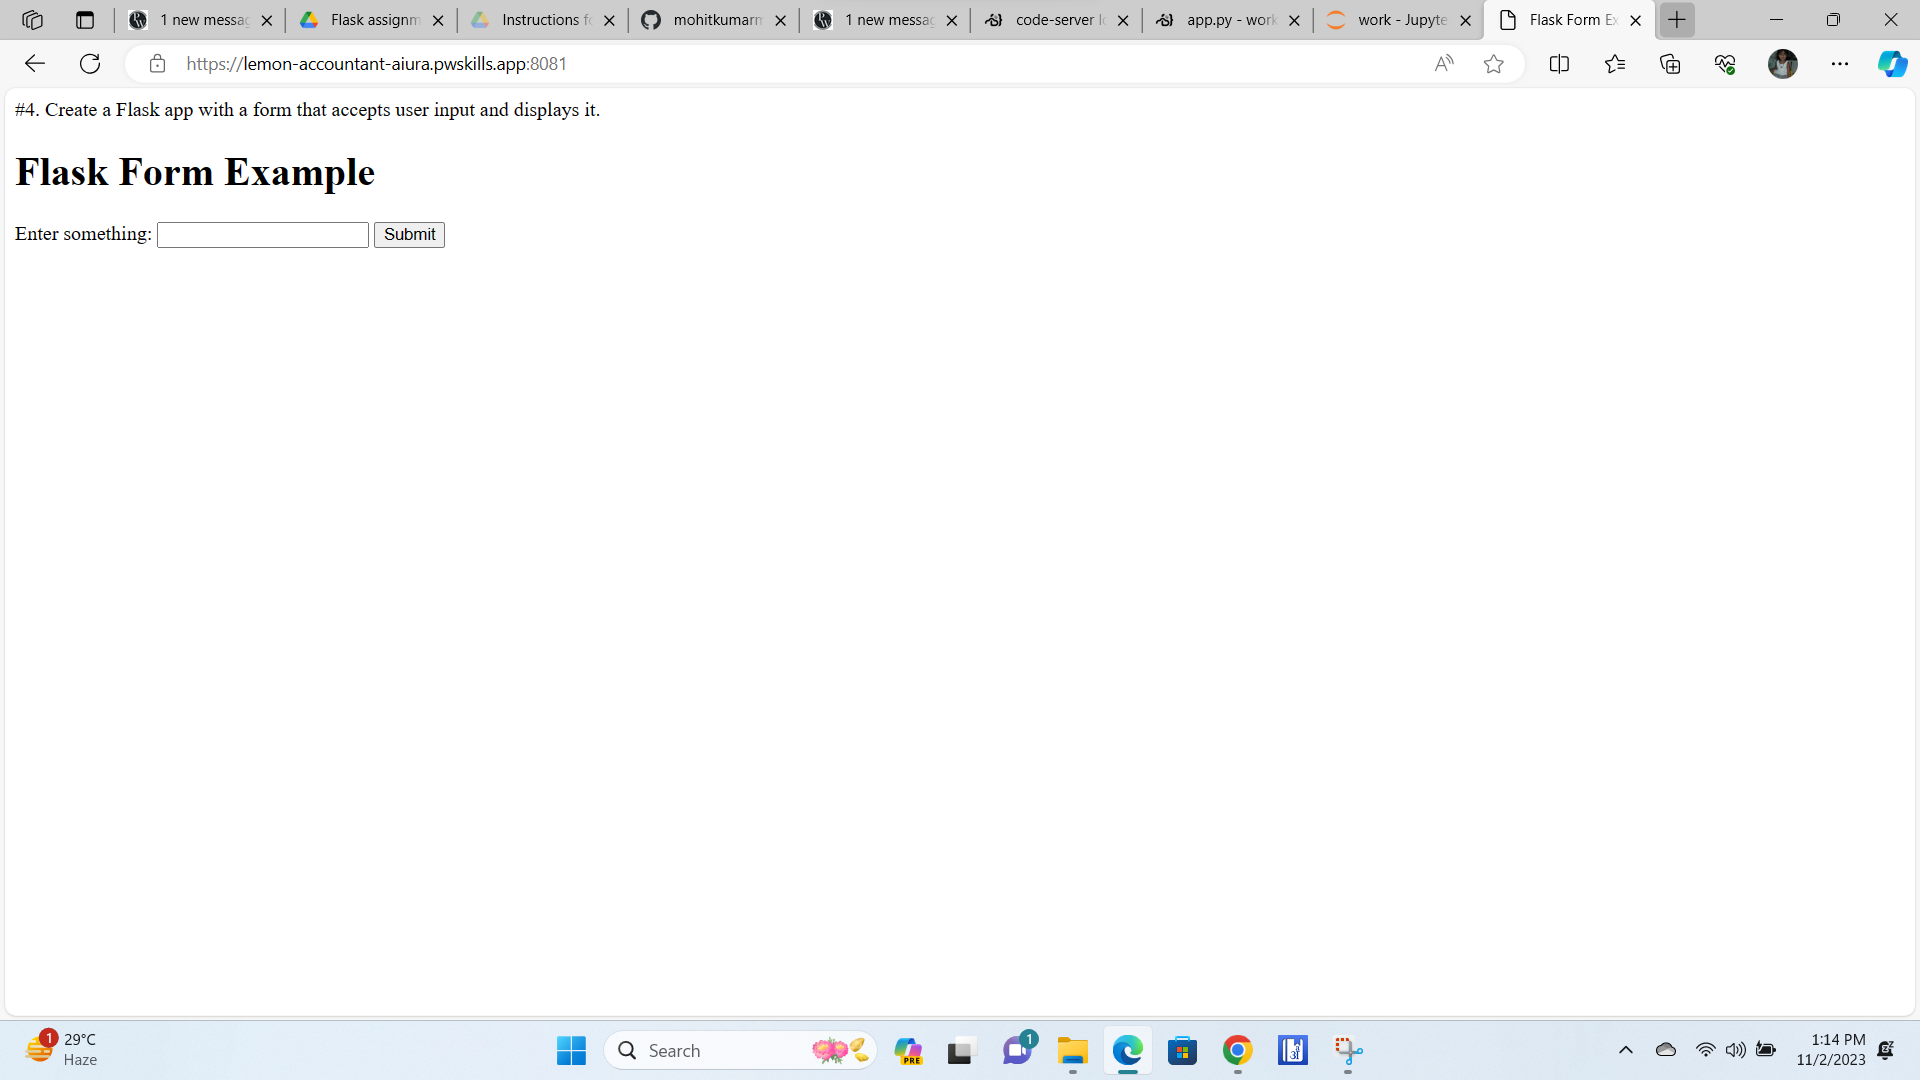

In [ ]:
#5. Implement user sessions in a Flask app to store and display user-specific data.
from flask import Flask, render_template, request, session, redirect, url_for

app = Flask(__name__)

# Set the secret key to enable session cookies
app.secret_key = 'your_secret_key'

# Define a route for the home page
@app.route('/', methods=['GET', 'POST'])
def index():
    # Check if 'username' key is in the session
    if 'username' in session:
        # If username is in session, welcome the user
        username = session['username']
        return f'Welcome, {username}! <a href="/logout">Logout</a>'
    else:
        # If username is not in session, show the login form
        if request.method == 'POST':
            # Get username from the form and store it in the session
            session['username'] = request.form['username']
            return redirect(url_for('index'))
        return render_template('index.html')

# Define a route to logout the user
@app.route('/logout')
def logout():
    # Remove 'username' key from the session to logout the user
    session.pop('username', None)
    return redirect(url_for('index'))

if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=8085)


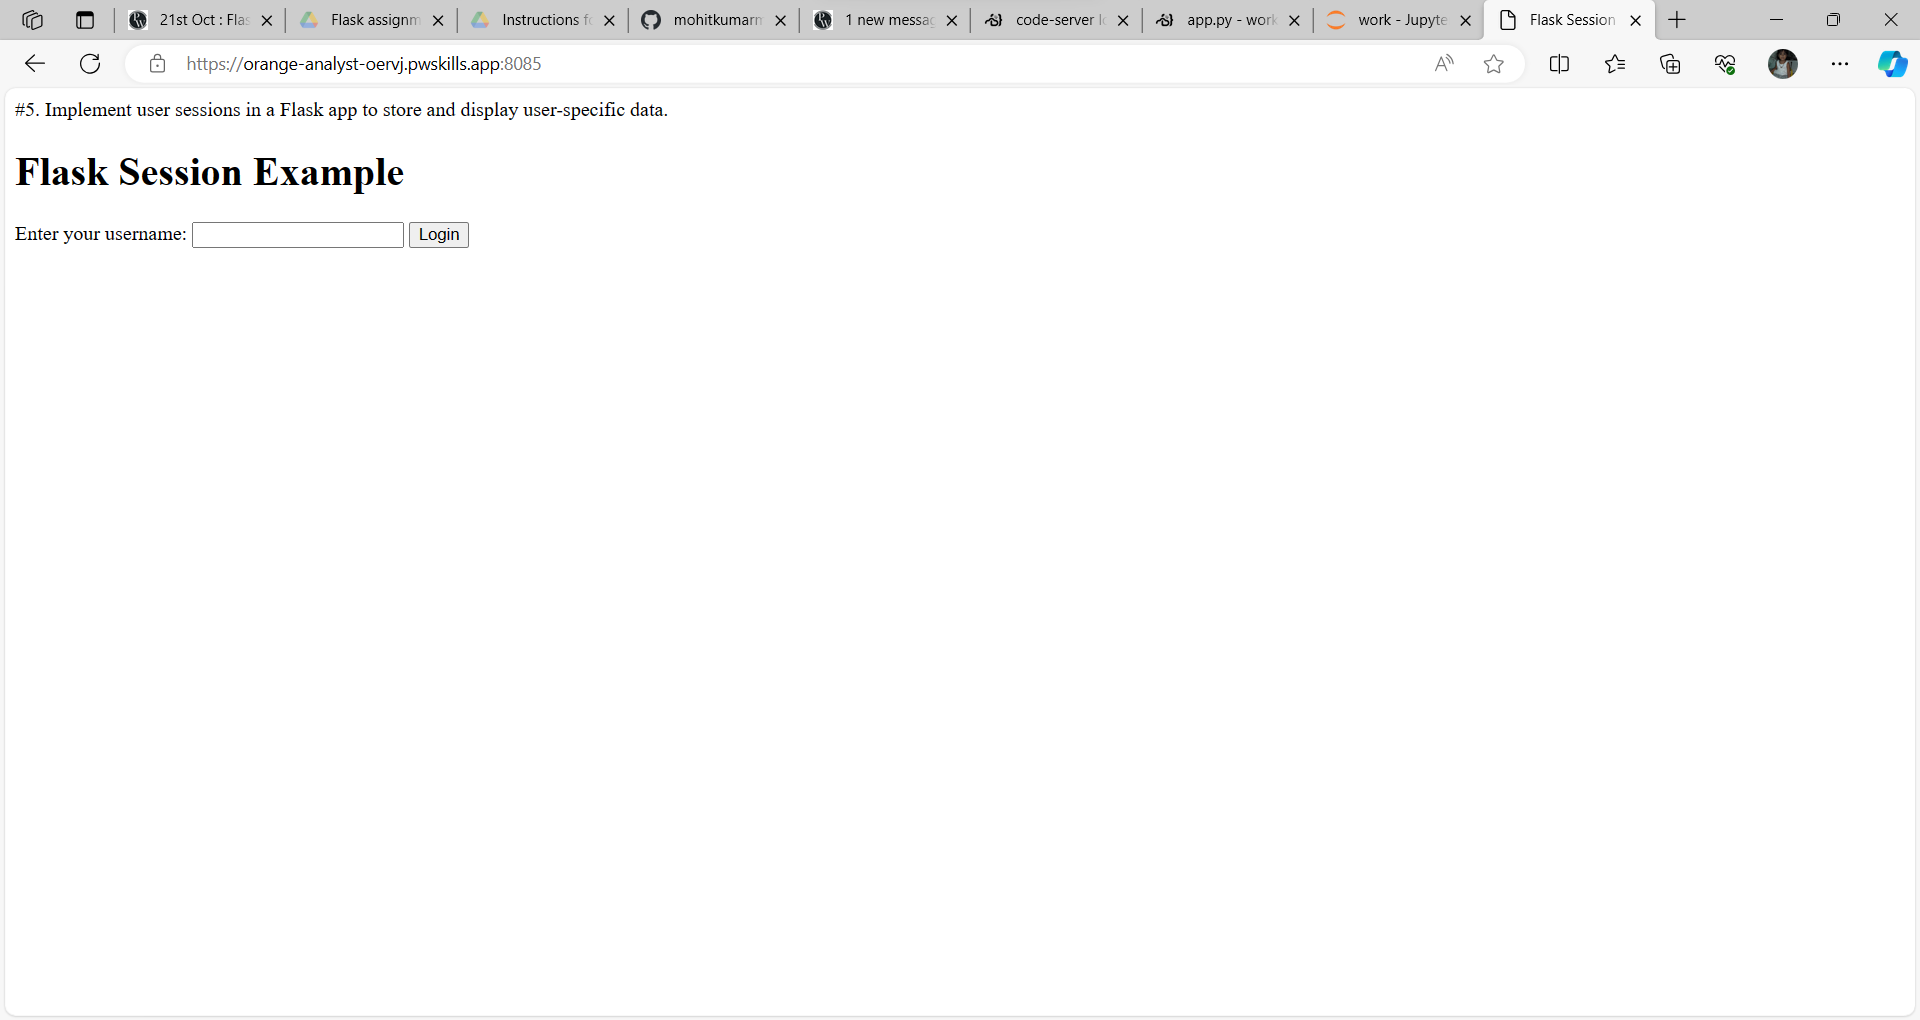

In [ ]:
#6. Build a Flask app that allows users to upload files and display them on the website.
from flask import Flask, request, render_template
import os

app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = 'uploads'  # Folder where uploaded files will be stored

# Ensure the 'uploads' directory exists
os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Check if the post request has a file part
        if 'file' not in request.files:
            return render_template('index.html', error='No file part')
        
        file = request.files['file']
        
        # If the user does not select a file, browser also submits an empty file
        if file.filename == '':
            return render_template('index.html', error='No selected file')
        
        if file:
            filename = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
            file.save(filename)
            return render_template('index.html', success='File uploaded successfully', filename=file.filename)
    
    return render_template('index.html')

if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=8080)


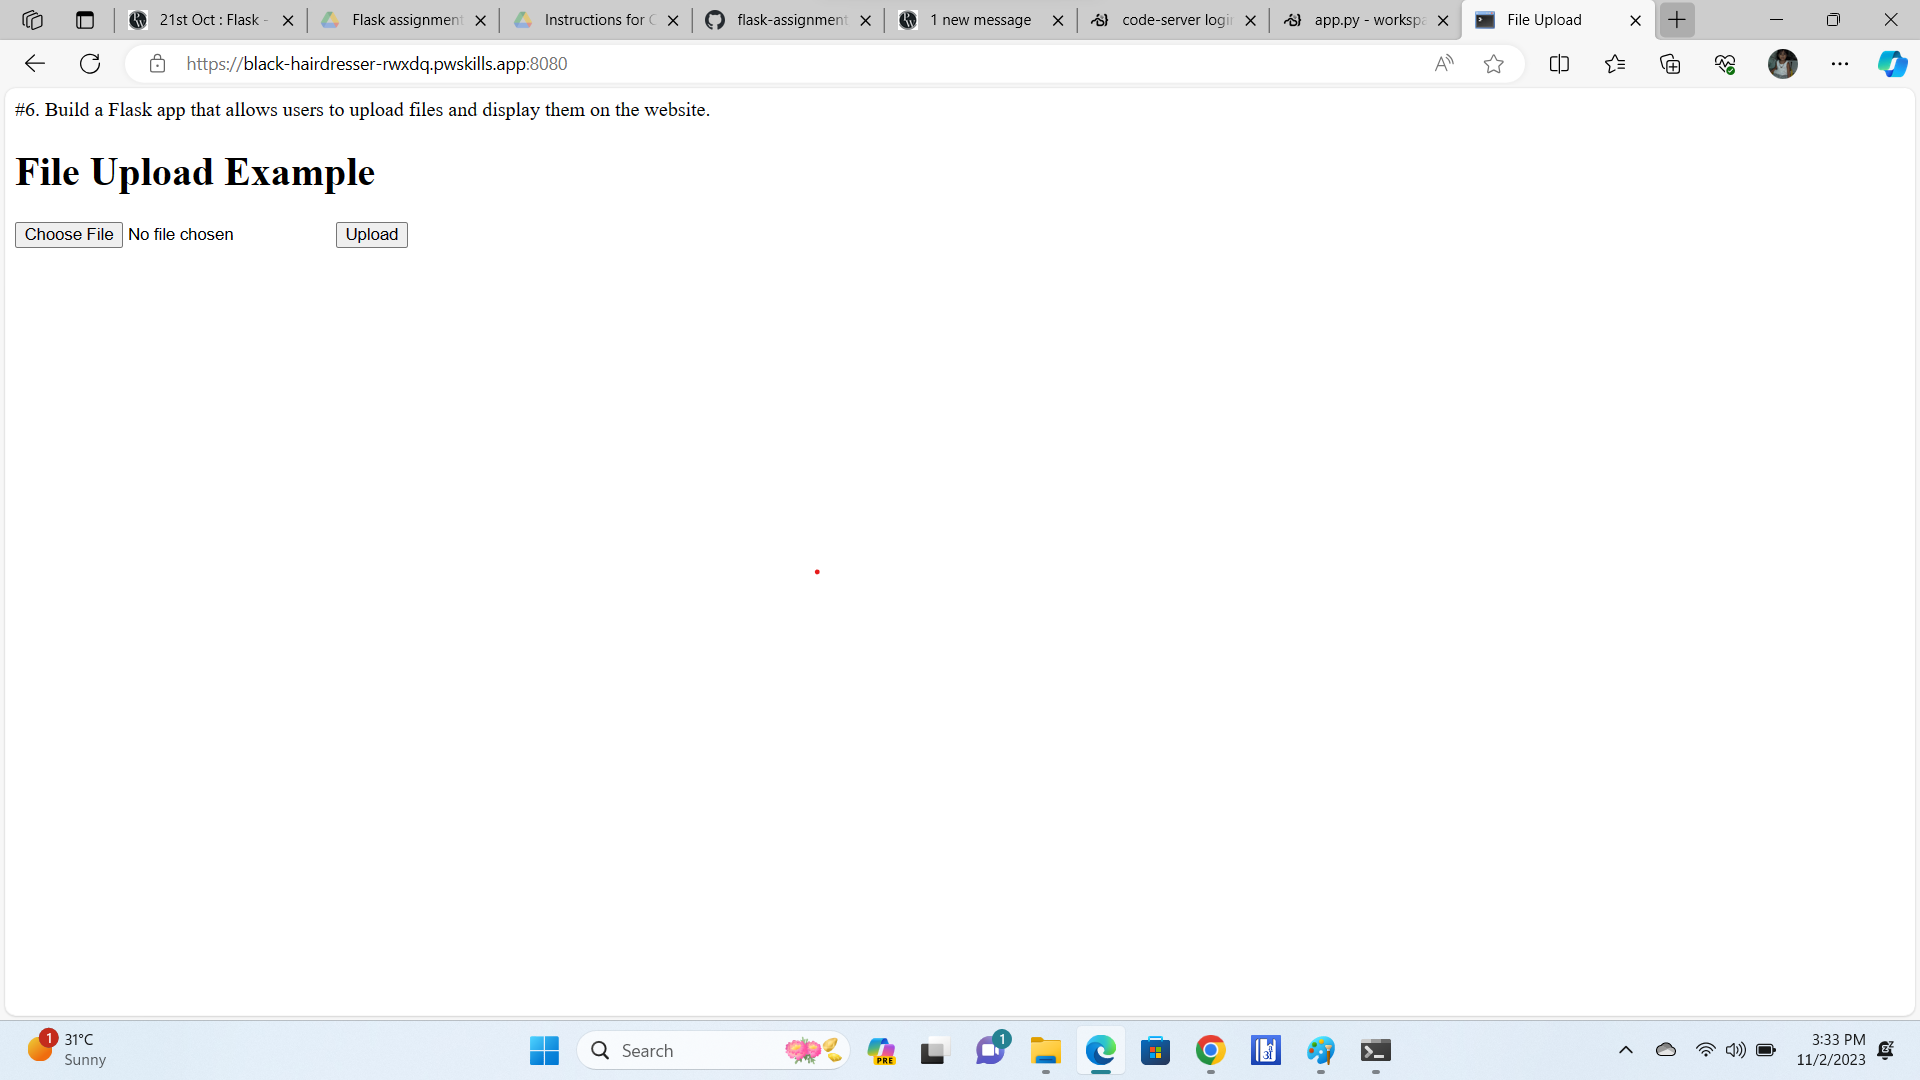

In [ ]:
#7. Integrate a SQLite database with Flask to perform CRUD operations on a list of items.
from flask import Flask, render_template, request, redirect, url_for, flash
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)
app.config['SECRET_KEY'] = 'your_secret_key_here'  # Change this to a random secret key
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///items.db'  # SQLite database file
db = SQLAlchemy(app)


class Item(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    name = db.Column(db.String(50), nullable=False)

    def __repr__(self):
        return f'<Item {self.name}>'


# Creating tables within the application context
with app.app_context():
    db.create_all()


# Routes and other code remain the same...




@app.route('/')
def index():
    items = Item.query.all()
    return render_template('index.html', items=items)


@app.route('/add', methods=['POST'])
def add():
    item_name = request.form['item']
    new_item = Item(name=item_name)
    try:
        db.session.add(new_item)
        db.session.commit()
        flash('Item added successfully!', 'success')
    except:
        db.session.rollback()
        flash('Error occurred while adding item.', 'error')
    return redirect(url_for('index'))


@app.route('/delete/<int:item_id>', methods=['POST'])
def delete(item_id):
    item_to_delete = Item.query.get_or_404(item_id)
    try:
        db.session.delete(item_to_delete)
        db.session.commit()
        flash('Item deleted successfully!', 'success')
    except:
        db.session.rollback()
        flash('Error occurred while deleting item.', 'error')
    return redirect(url_for('index'))


if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=5005)


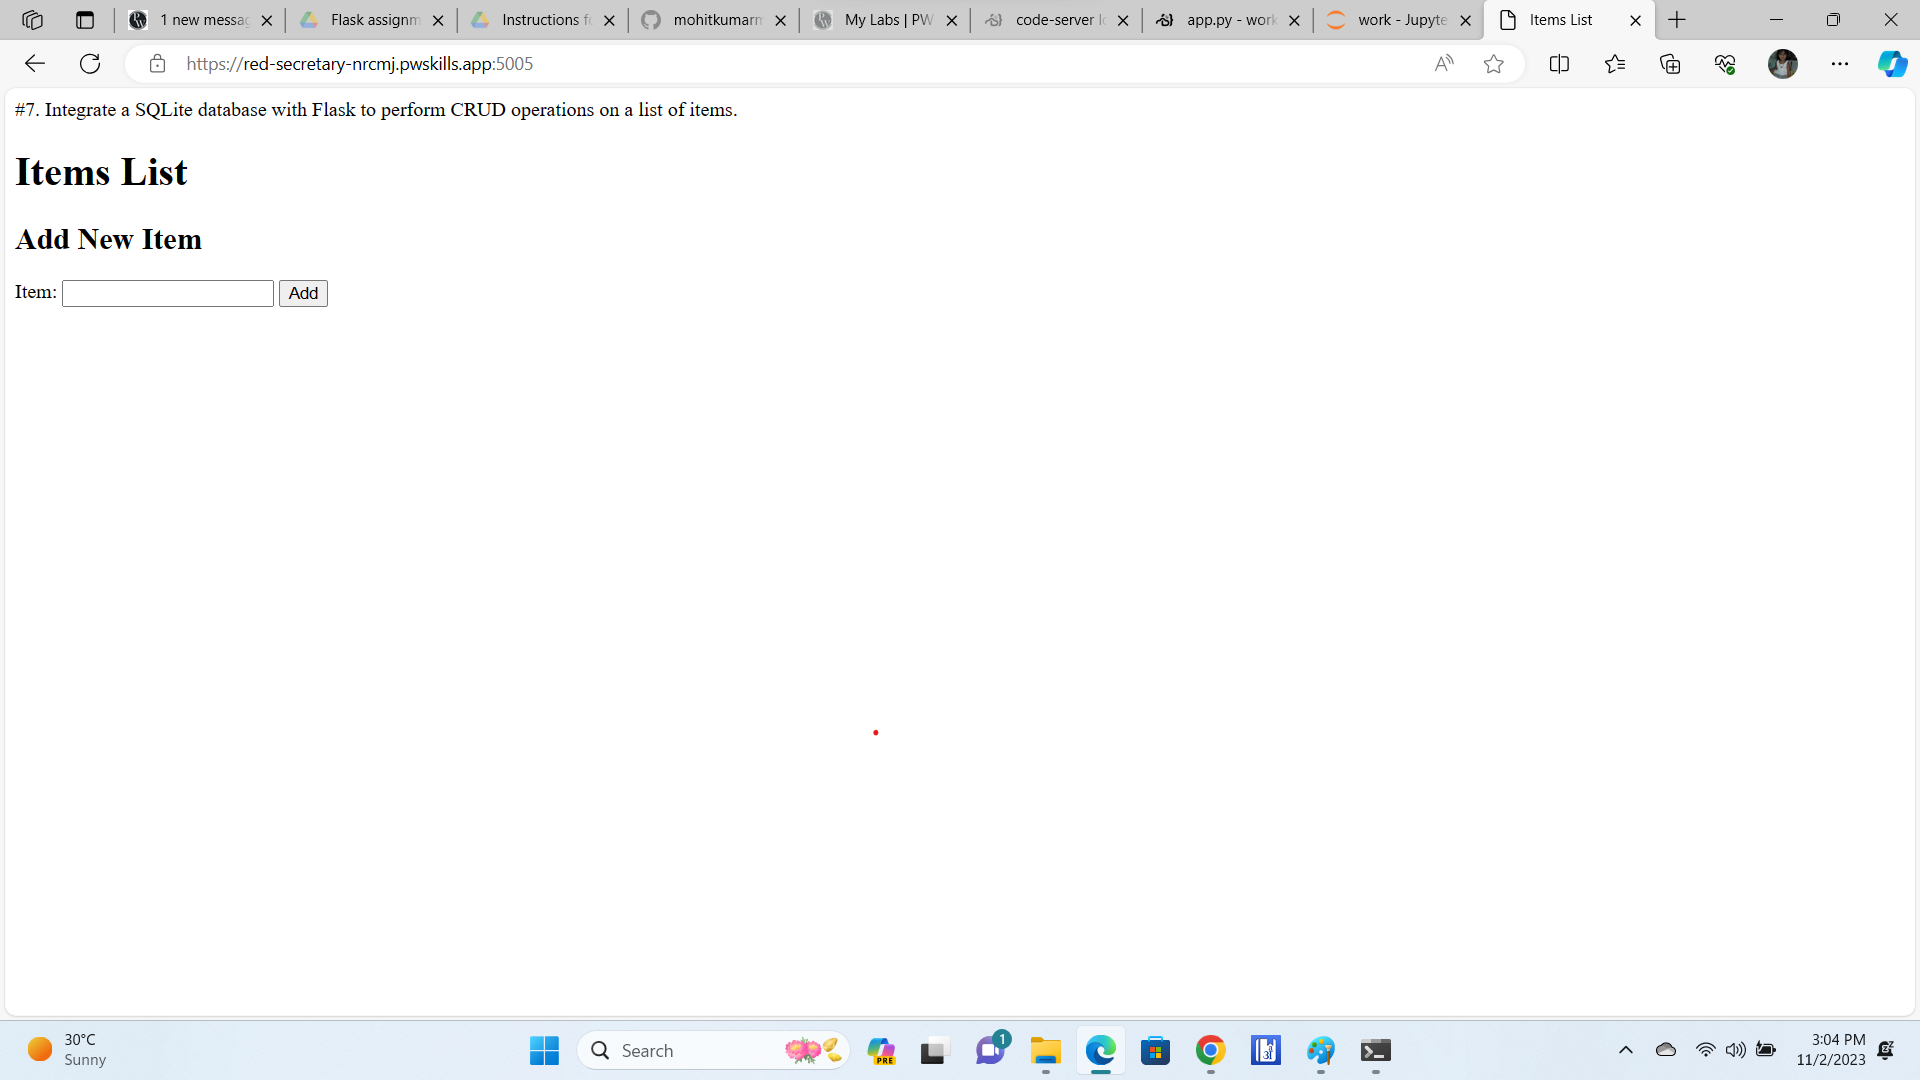

In [ ]:
#8.Implement user authentication and registration in a Flask app using Flask-Login.
from flask import Flask, render_template, redirect, url_for, request, flash
from flask_login import LoginManager, UserMixin, login_user, login_required, logout_user


app = Flask(__name__)
app.config['SECRET_KEY'] = 'b2f7276693524dc1283929277faa0eae'  # Change this to a random secret key
login_manager = LoginManager(app)
login_manager.login_view = 'login'

# Dummy database to store user data (in a real app, use a database)
users = {'user': {'password': 'password'}}


class User(UserMixin):
    def __init__(self, username):
        self.username = username

    def get_id(self):
        return self.username


@login_manager.user_loader
def load_user(user_id):
    return User(user_id)


@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']
        user = users.get(username)
        if user and user['password'] == password:
            user_obj = User(username)
            login_user(user_obj)
            flash('Logged in successfully.', 'success')
            return redirect(url_for('profile'))
        else:
            flash('Invalid username or password.', 'error')
    return render_template('login.html')


@app.route('/profile')
@login_required
def profile():
    return f'Hello, {current_user.username}! This is your profile page.'


@app.route('/logout')
@login_required
def logout():
    logout_user()
    flash('Logged out successfully.', 'success')
    return redirect(url_for('login'))


if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=8004)


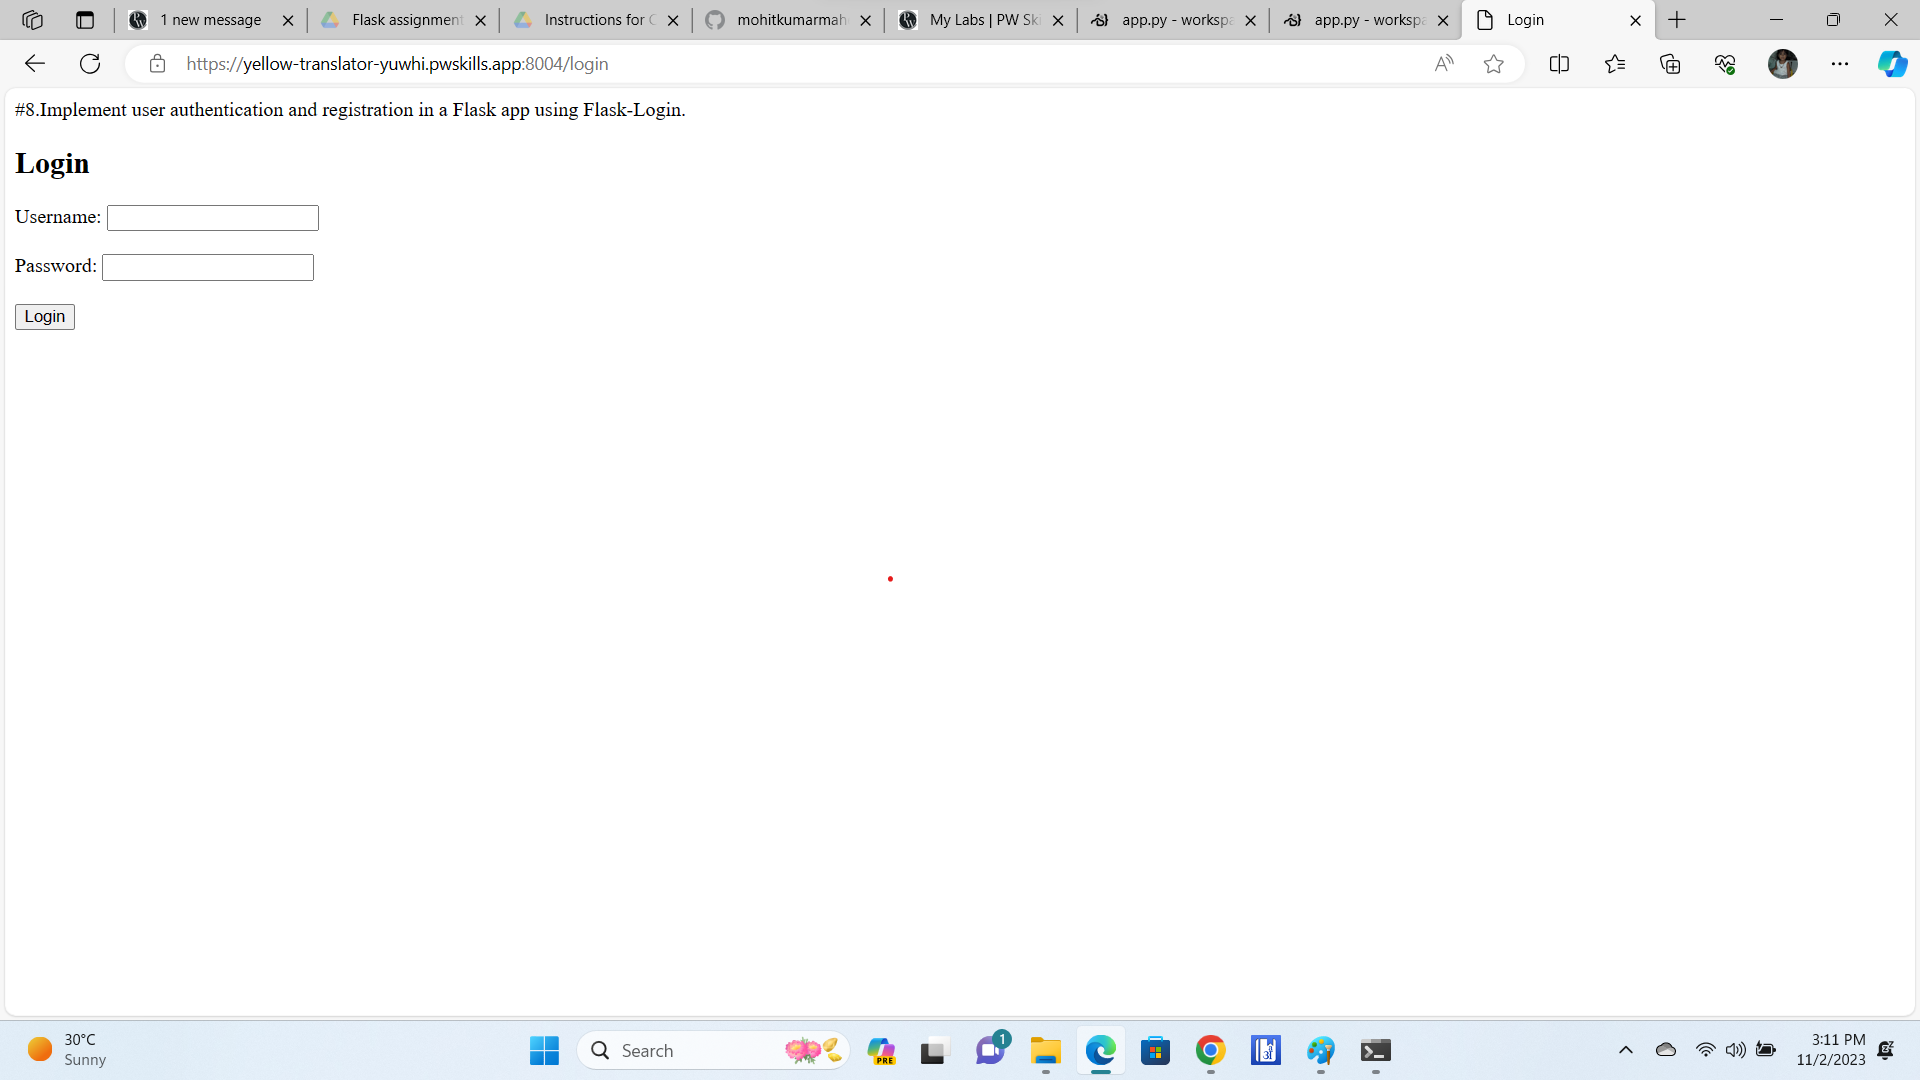

In [ ]:
#9. Create a RESTful API using Flask to perform CRUD operations on resources like books or movies.from flask import Flask, render_template
from flask_restful import Api, Resource
from flask_sqlalchemy import SQLAlchemy

from flask import Flask, render_template, redirect, url_for, request, flash
from flask_login import LoginManager, UserMixin, login_user, login_required, logout_user

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///books.db'  # SQLite database file
db = SQLAlchemy(app)
api = Api(app)

# Book model
class Book(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    title = db.Column(db.String(100), nullable=False)
    author = db.Column(db.String(100), nullable=False)

# Create the tables before the first request
with app.app_context():
    db.create_all()

# RESTful API resource for single book
class BookResource(Resource):
    def get(self, book_id):
        book = Book.query.get_or_404(book_id)
        return {'id': book.id, 'title': book.title, 'author': book.author}

    def put(self, book_id):
        data = request.get_json()
        book = Book.query.get_or_404(book_id)
        book.title = data['title']
        book.author = data['author']
        db.session.commit()
        return {'message': 'Book updated successfully'}

    def delete(self, book_id):
        book = Book.query.get_or_404(book_id)
        db.session.delete(book)
        db.session.commit()
        return {'message': 'Book deleted successfully'}


# RESTful API resource for book collection
class BookListResource(Resource):
    def get(self):
        books = Book.query.all()
        return [{'id': book.id, 'title': book.title, 'author': book.author} for book in books]

    def post(self):
        data = request.get_json()
        new_book = Book(title=data['title'], author=data['author'])
        db.session.add(new_book)
        db.session.commit()
        return {'message': 'Book created successfully', 'id': new_book.id}


api.add_resource(BookResource, '/api/books/<int:book_id>')
api.add_resource(BookListResource, '/api/books')

# HTML routes for rendering web interface
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/books')
def books():
    return render_template('books.html')

if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=5005)


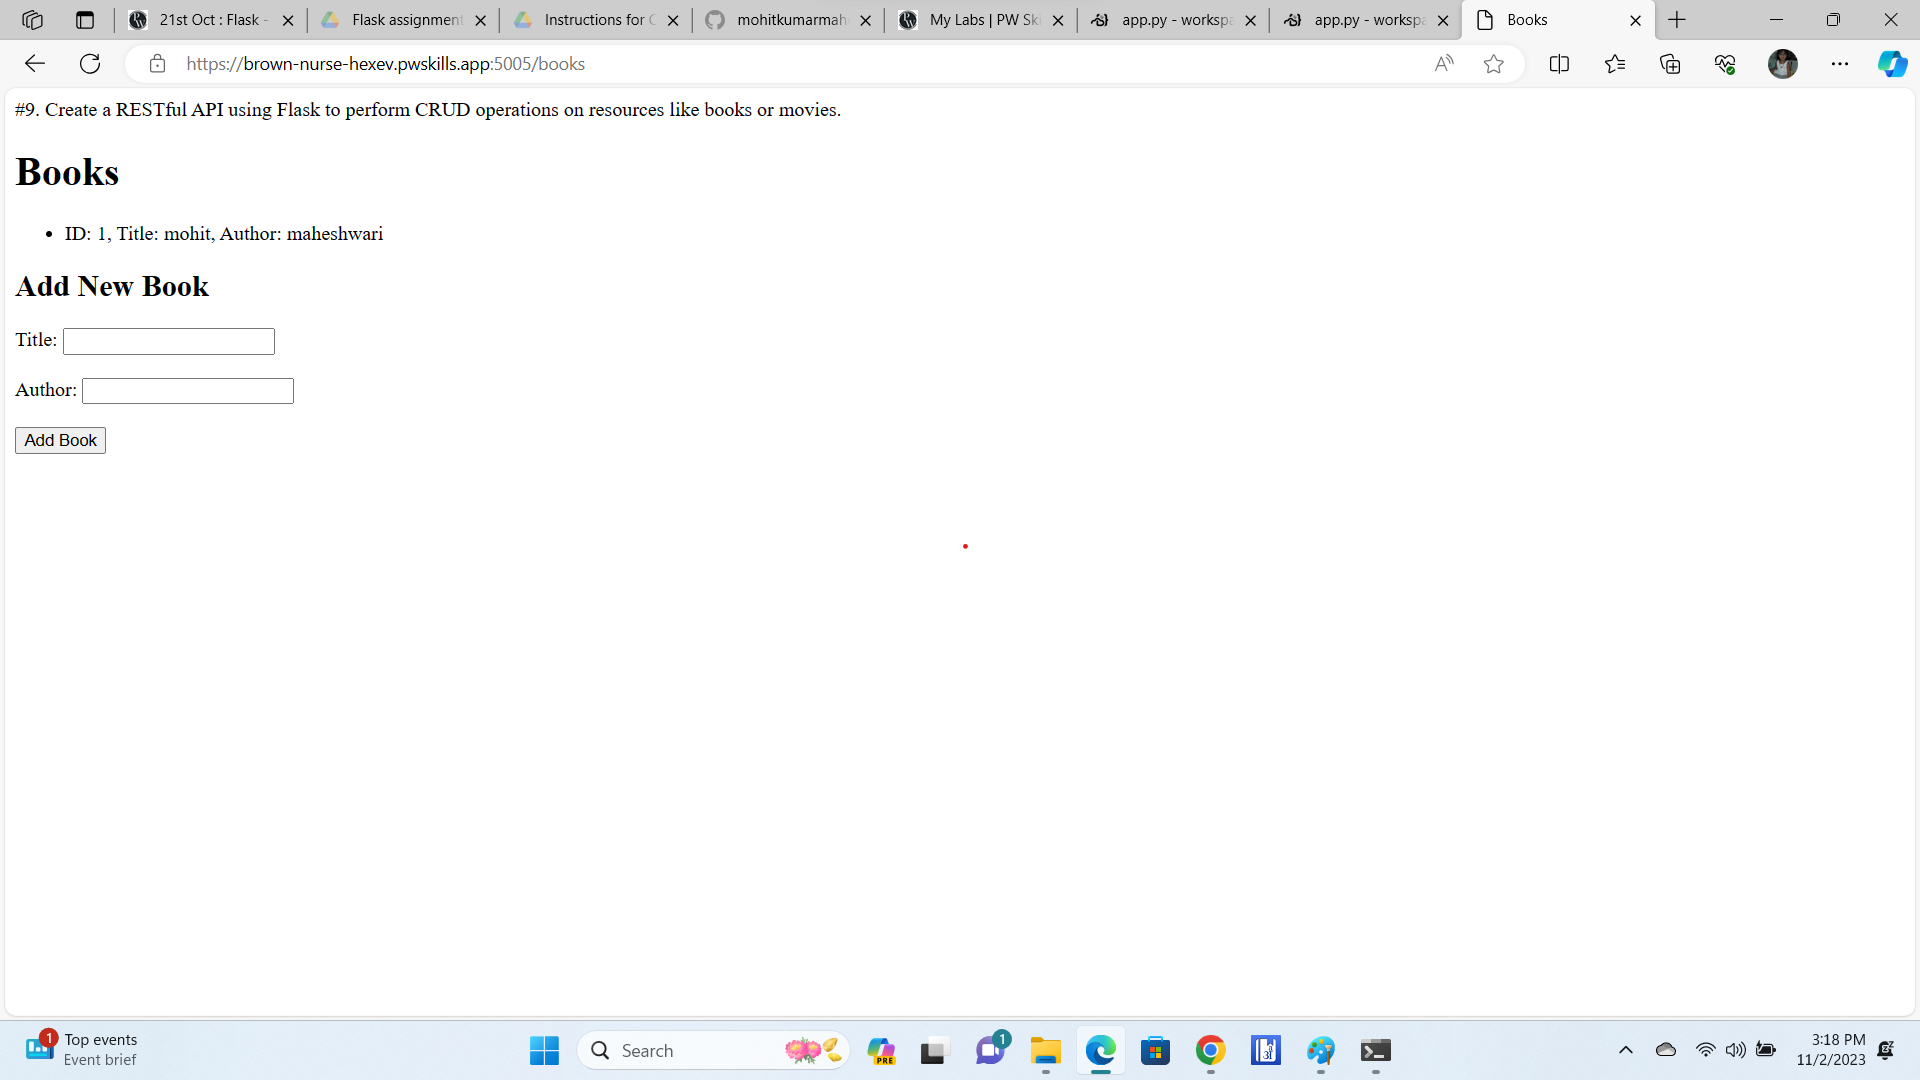

In [ ]:
#10. Design a Flask app with proper error handling for 404 and 500 errors.
from flask import Flask, render_template, redirect, url_for, request, flash
from flask_login import LoginManager, UserMixin, login_user, login_required, logout_user

app = Flask(__name__)
app.secret_key = 'your_secret_key_here'  # Change this to a secure random key
login_manager = LoginManager()
login_manager.init_app(app)

# Dummy user database (replace this with a real database)
users = {
    'user_id': {
        'username': 'username',
        'password': 'password'
    }
}

# User class for Flask-Login
class User(UserMixin):
    def __init__(self, user_id):
        self.id = user_id

# User loader function for Flask-Login
@login_manager.user_loader
def load_user(user_id):
    return User(user_id)

# Routes for registration, login, dashboard, and logout
# (Routes implementation goes here)

# Custom error handling for 404 - Page Not Found
@app.errorhandler(404)
def page_not_found(error):
    return render_template('404.html'), 404

# Custom error handling for 500 - Internal Server Error
@app.errorhandler(500)
def internal_server_error(error):
    return render_template('500.html'), 500

if __name__ == '__main__':
    app.run(host="0.0.0.0",debug=True,port=5005)



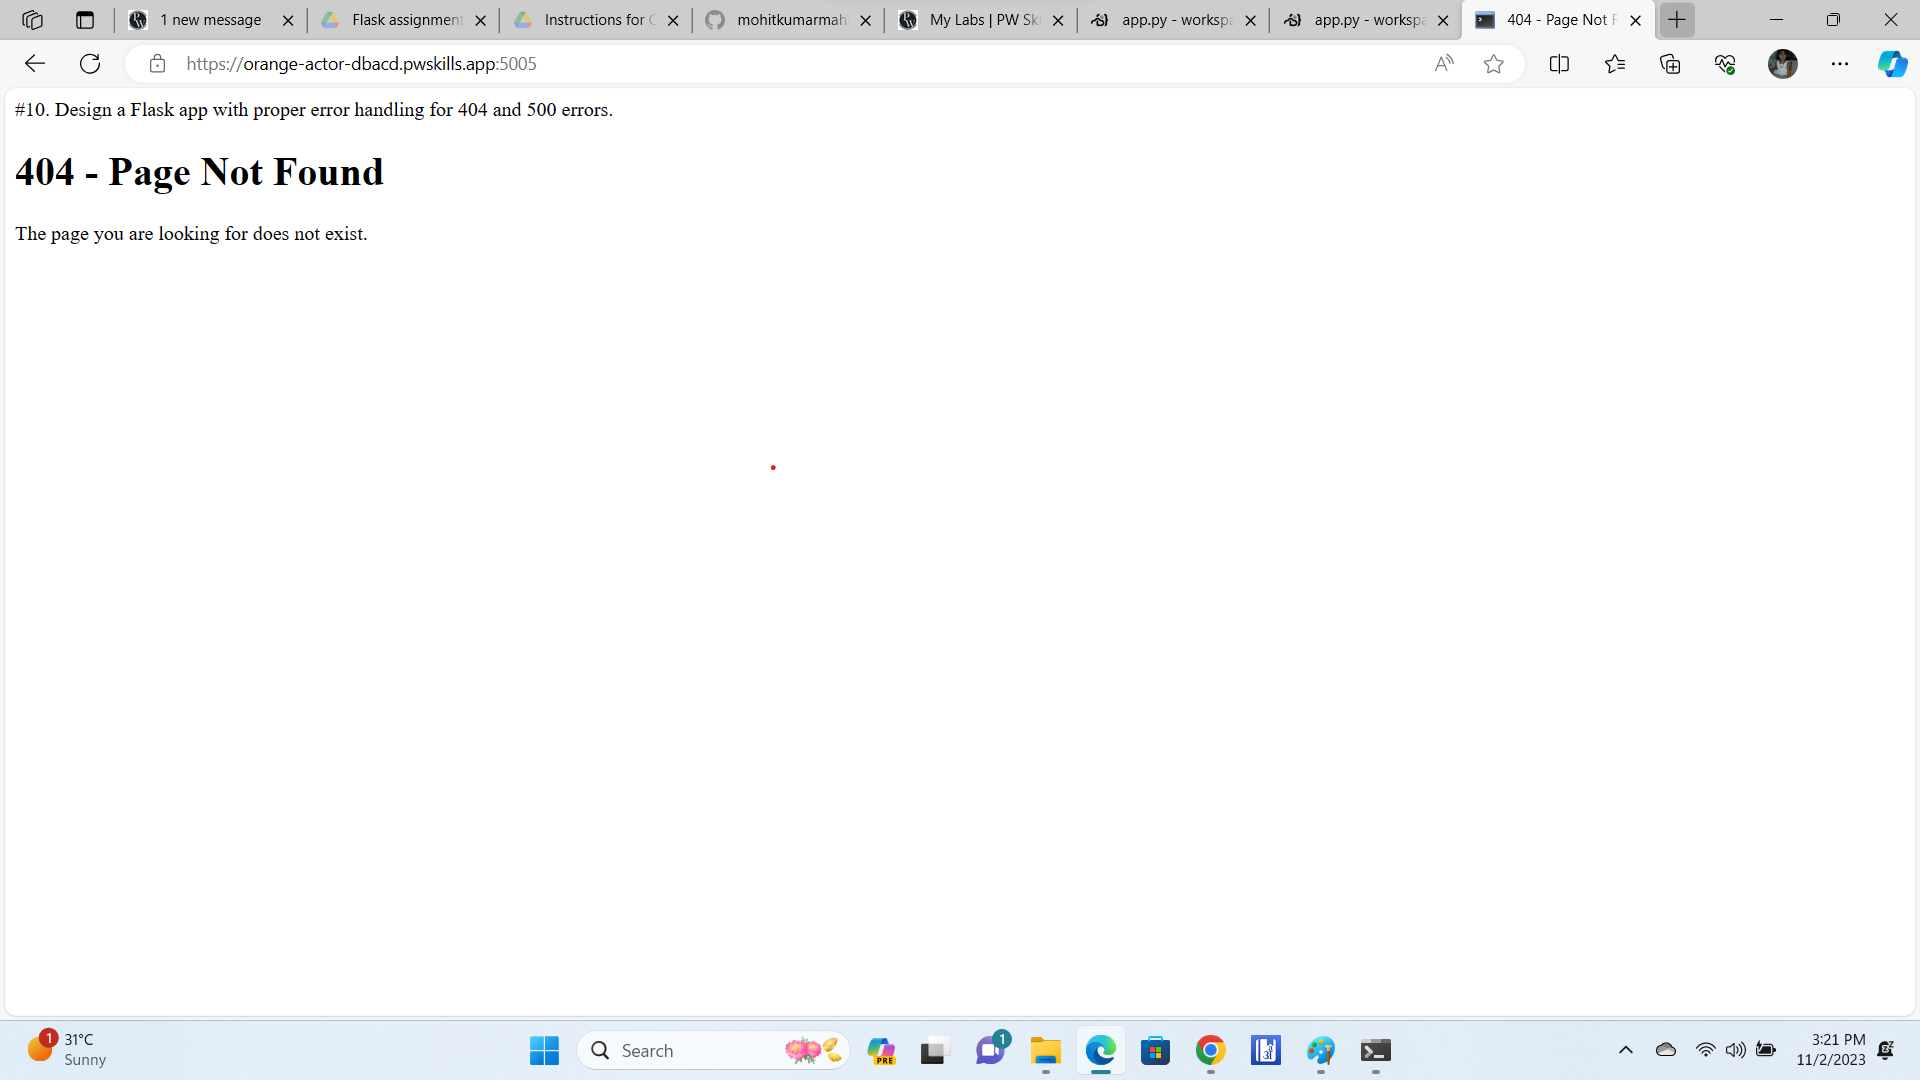

In [ ]:
#11. Create a real-time chat application using Flask-SocketIO.
from flask import Flask, render_template
from flask_socketio import SocketIO

app = Flask(__name__)
app.config['SECRET_KEY'] = 'your_secret_key_here'  # Change this to a secure random key
socketio = SocketIO(app)

@app.route('/')
def index():
    return render_template('index.html')

@socketio.on('message')
def handle_message(message):
    socketio.emit('message', message)  # Broadcast the message to all connected clients

if __name__ == '__main__':
    socketio.run(app,host="0.0.0.0", debug=True,port=5004)


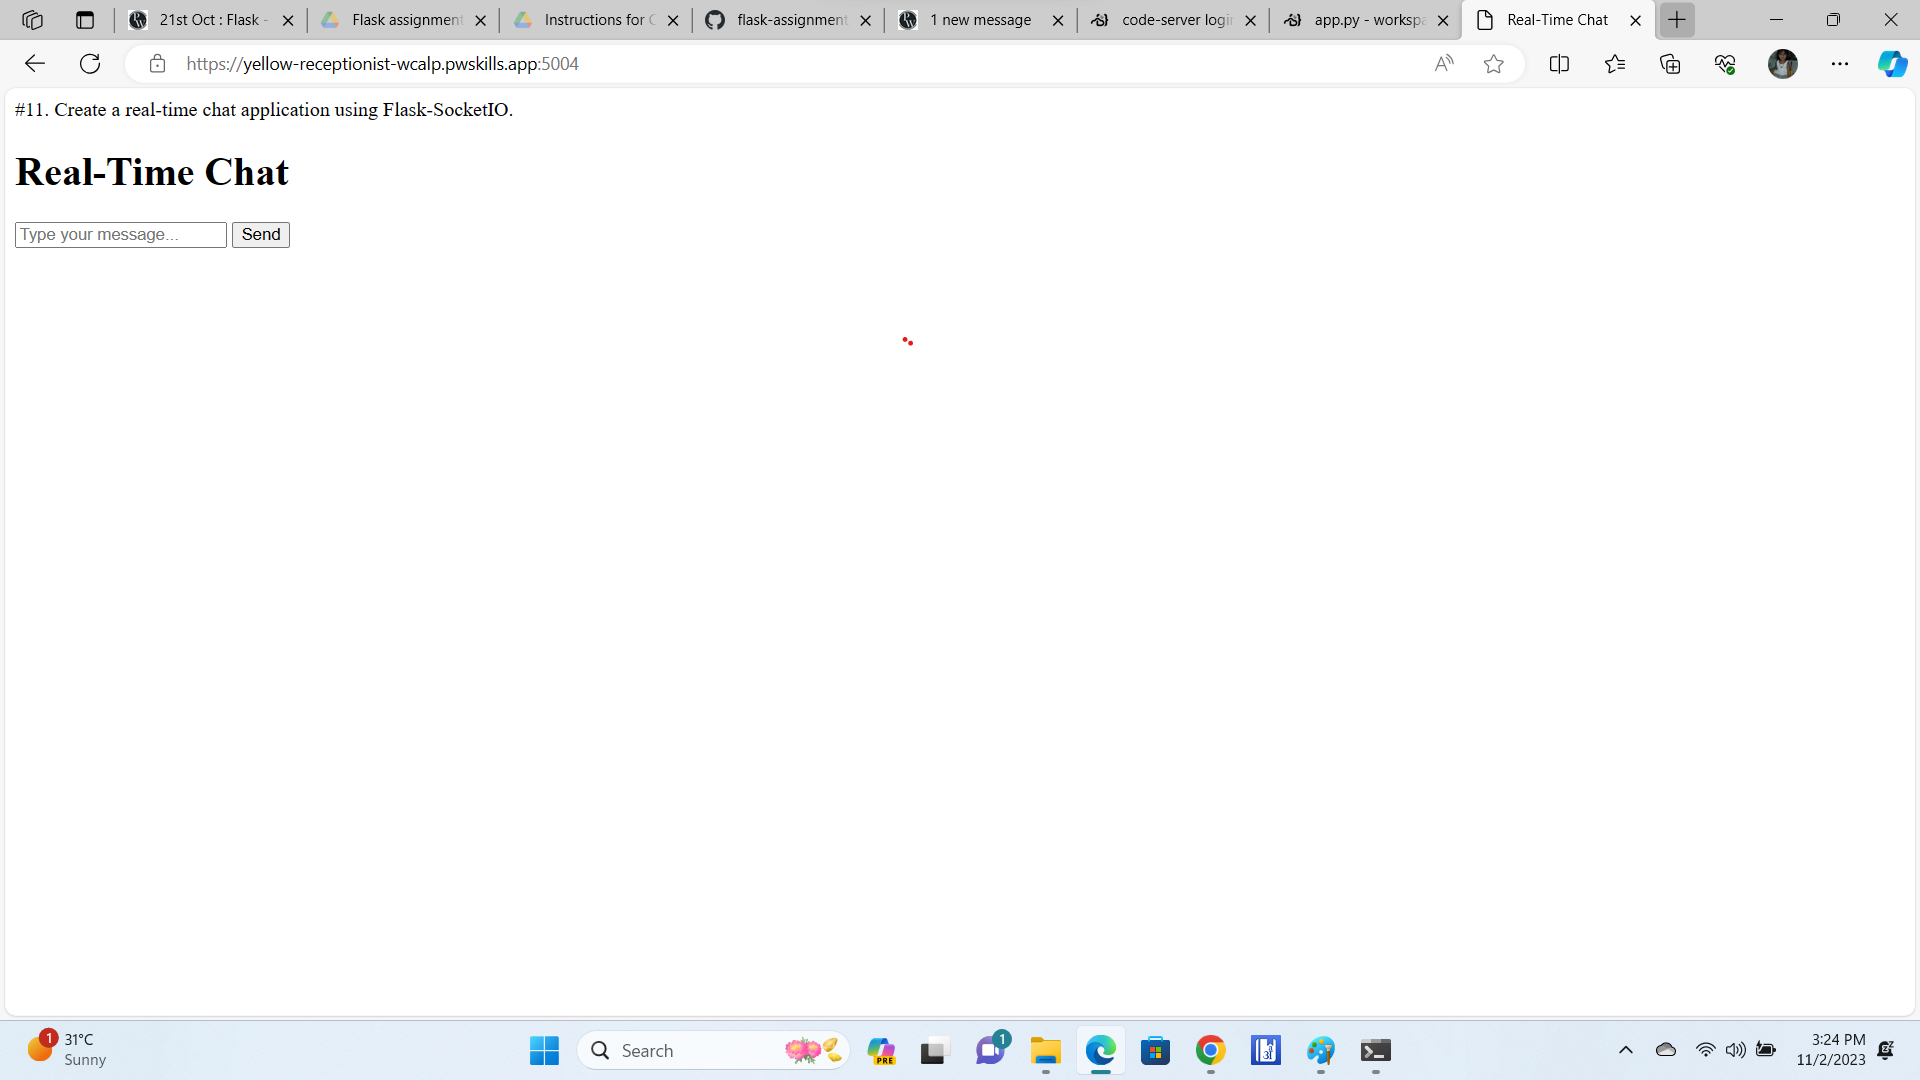

In [ ]:
#12. Build a Flask app that updates data in real-time using WebSocket connections.
from flask import Flask, render_template
from flask_socketio import SocketIO

app = Flask(__name__)
app.config['SECRET_KEY'] = 'your_secret_key_here'  # Change this to a secure random key
socketio = SocketIO(app)

@app.route('/')
def index():
    return render_template('index.html')

@socketio.on('update_data')
def handle_update(data):
    socketio.emit('update_data', data)  # Broadcast the updated data to all connected clients

if __name__ == '__main__':
    socketio.run(app,host="0.0.0.0" ,debug=True,port=5005)


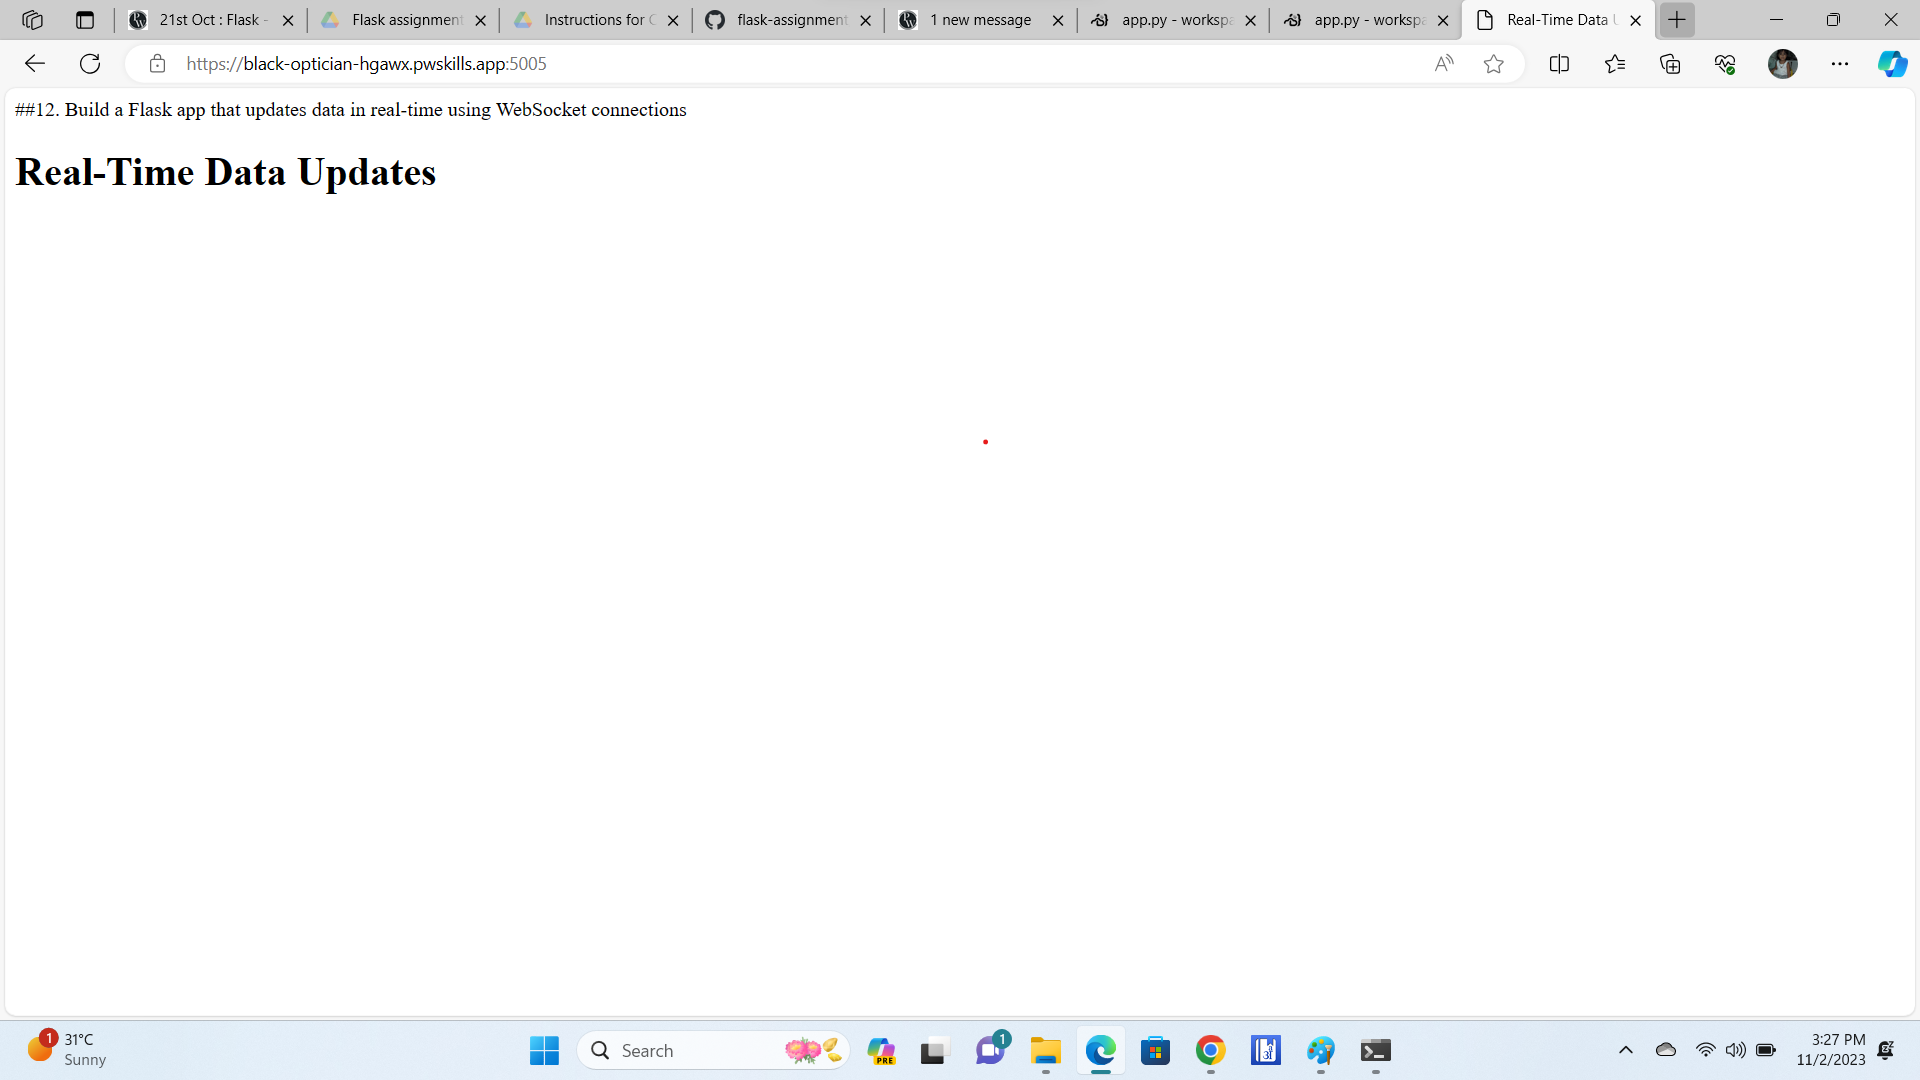

In [ ]:
#13. Implement notifications in a Flask app using websockets to notify users of updates.
from flask import Flask, render_template
from flask_socketio import SocketIO

app = Flask(__name__)
app.config['SECRET_KEY'] = 'your_secret_key_here'  # Change this to a secure random key
socketio = SocketIO(app)

@app.route('/')
def index():
    return render_template('index.html')

@socketio.on('notify_user')
def handle_notification(data):
    user_id = data['user_id']
    message = data['message']
    socketio.emit(f'notification_{user_id}', message)  # Send the notification to the specific user

if __name__ == '__main__':
    socketio.run(app,host="0.0.0.0" ,debug=True,port=5005 )


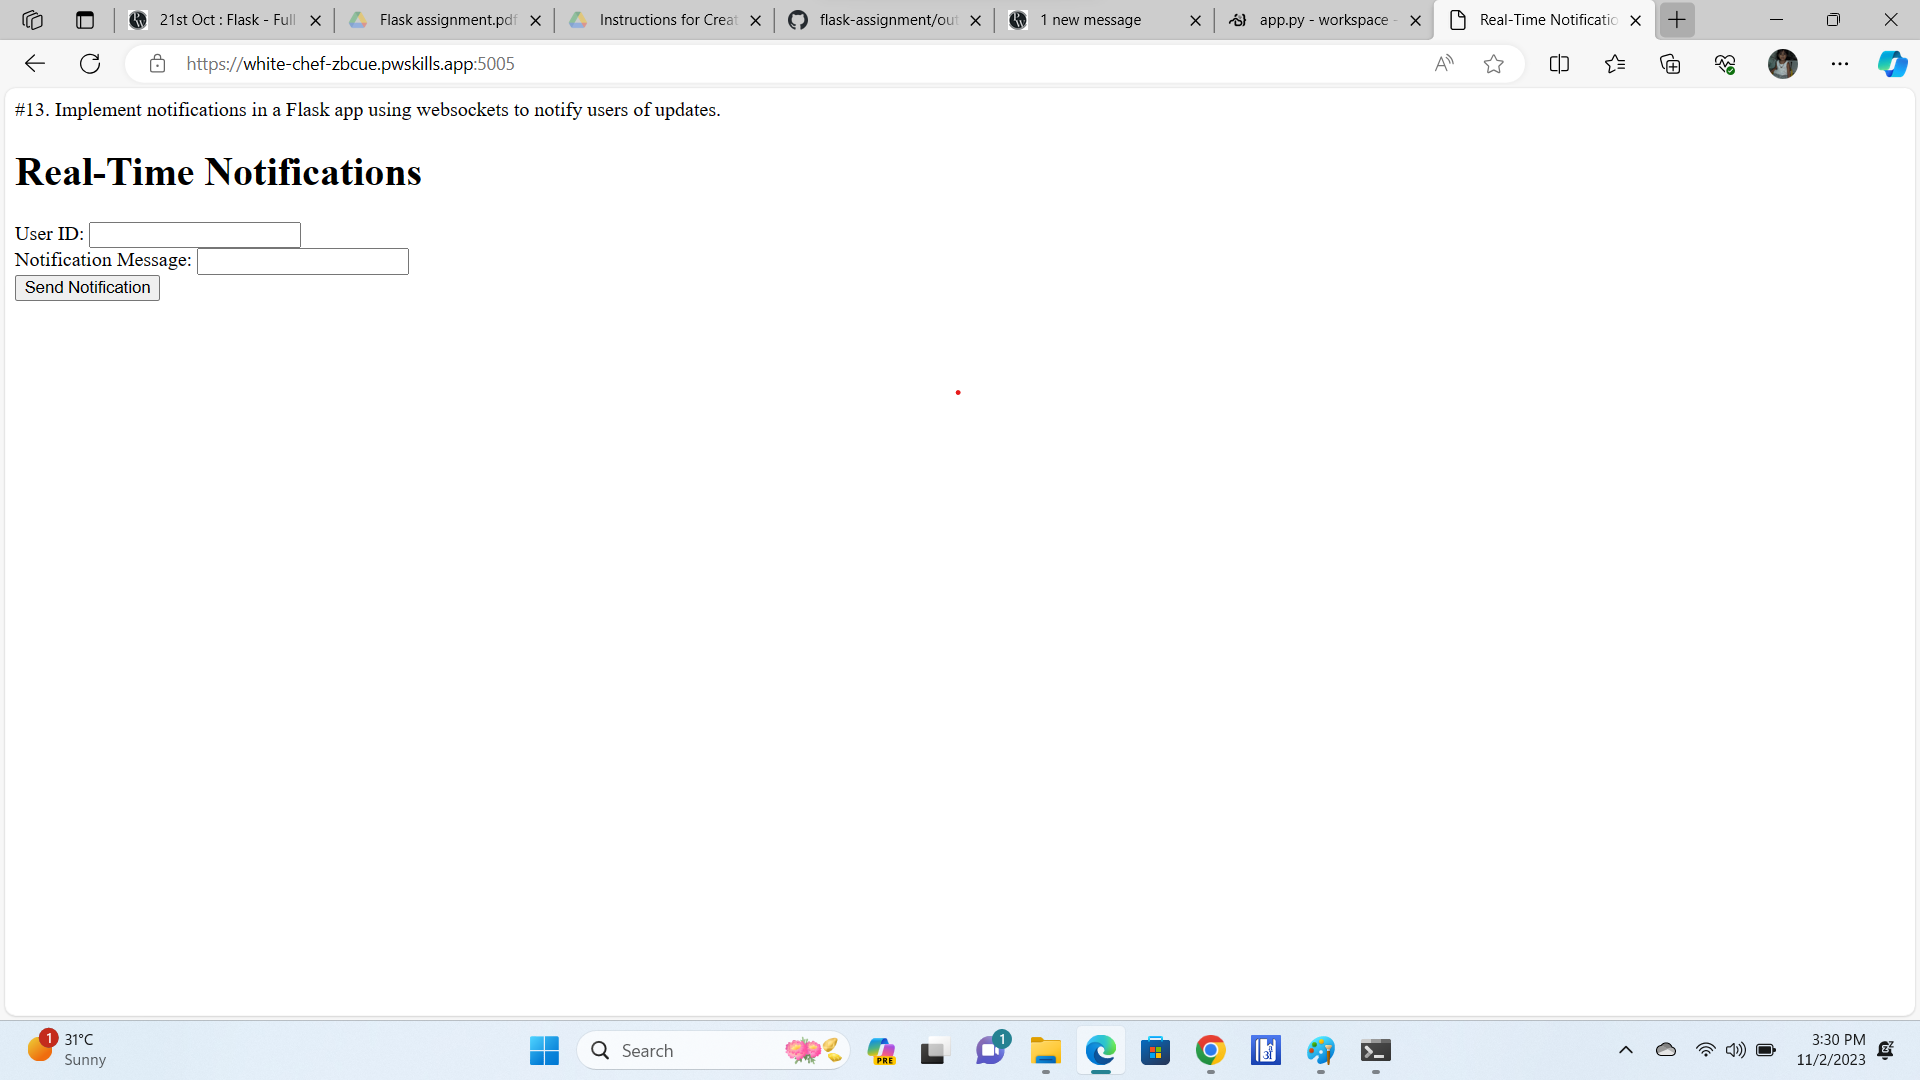

In [ ]:
#complete flask assignment